<a href="https://colab.research.google.com/github/kailee0422/Machine-Learning/blob/main/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data
In this example, we use the iris dataset. We split the data into a train and test dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# K-nearest neighbors classifier
We want to use a k-nearest neighbors classifier considering a neighborhood of 11(hyperparameter) data points. Since our k-nearest neighbors model uses euclidean distance to find the nearest neighbors, it is therefore important to scale the data beforehand. Refer to the example entitled Importance of Feature Scaling for more detailed information.

Thus, we use a Pipeline to chain a scaler before to use our classifier.
# Decision boundary
Now, we fit two classifiers with different values of the parameter weights. We plot the decision boundary of each classifier as well as the original dataset to observe the difference.
There are two different parameter :

uniform : 所有鄰居的影響相同，只根據鄰居的數量來做分類。

distance : 會考慮鄰居的距離，距離越近的鄰居對分類結果影響越大。
# Parameter Tuning
I change the k value and find the highest accuracy separately for uniform and distance weighting schemes.

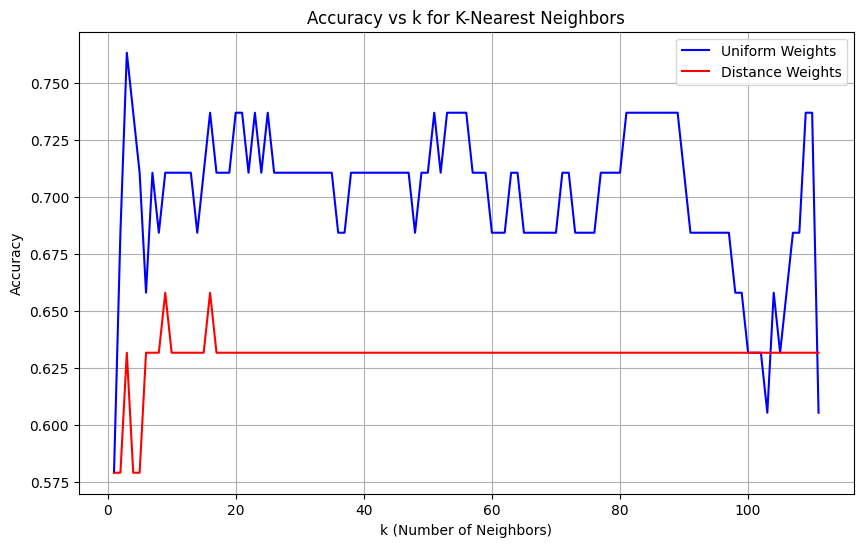

Best accuracy with uniform weights: 0.7632 at k = 3
Best accuracy with distance weights: 0.6579 at k = 9
Uniform weights had higher accuracy (0.7632) compared to distance weights (0.6579)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Initialize empty lists to store accuracy for each k-value
k_values = range(1, len(X_train))  # k should be <= number of training samples
accuracies_uniform = []
accuracies_distance = []

# Loop over k values and calculate accuracy for both "uniform" and "distance" weights
for k in k_values:
    clf = Pipeline(
        steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )

    # Calculate accuracy for "uniform" weights
    clf.set_params(knn__weights='uniform').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_uniform = np.mean(y_test == y_pred)
    accuracies_uniform.append(accuracy_uniform)

    # Calculate accuracy for "distance" weights
    clf.set_params(knn__weights='distance').fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_distance = np.mean(y_test == y_pred)
    accuracies_distance.append(accuracy_distance)

# Plot accuracy vs k for both uniform and distance
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_uniform, label='Uniform Weights', color='blue')
plt.plot(k_values, accuracies_distance, label='Distance Weights', color='red')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for K-Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Find the k with highest accuracy for each weighting scheme
best_k_uniform = k_values[np.argmax(accuracies_uniform)]
best_accuracy_uniform = max(accuracies_uniform)

best_k_distance = k_values[np.argmax(accuracies_distance)]
best_accuracy_distance = max(accuracies_distance)

# Print out the best accuracy for each weighting scheme and compare
print(f"Best accuracy with uniform weights: {best_accuracy_uniform:.4f} at k = {best_k_uniform}")
print(f"Best accuracy with distance weights: {best_accuracy_distance:.4f} at k = {best_k_distance}")

if best_accuracy_uniform > best_accuracy_distance:
    print(f"Uniform weights had higher accuracy ({best_accuracy_uniform:.4f}) compared to distance weights ({best_accuracy_distance:.4f})")
else:
    print(f"Distance weights had higher accuracy ({best_accuracy_distance:.4f}) compared to uniform weights ({best_accuracy_uniform:.4f})")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
)

Accuracy with weights='uniform': 0.7105
Accuracy with weights='distance': 0.6579


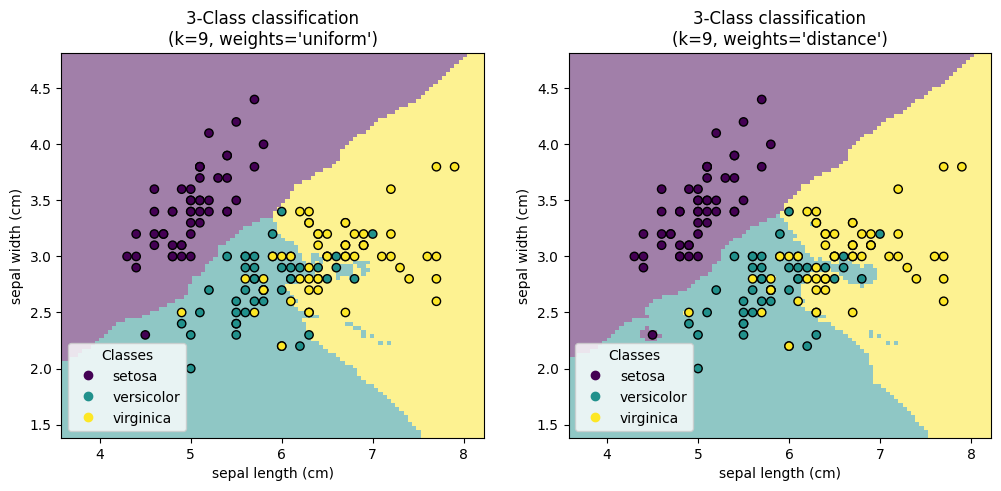

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    print(f"Accuracy with weights={weights!r}: {accuracy:.4f}")
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

# Nearest Centroid Classification
Sample usage of Nearest Centroid classification. It will plot the decision boundaries for each class.

None 0.8133333333333334
0.2 0.82


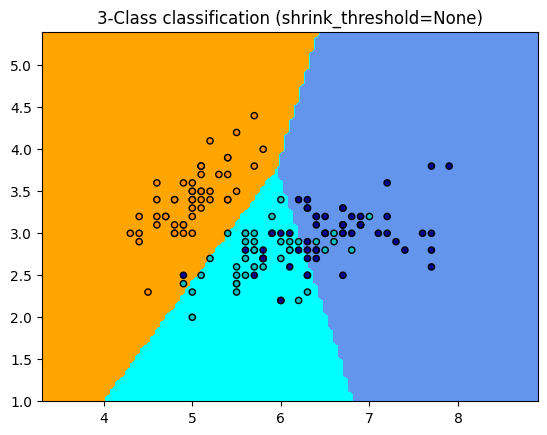

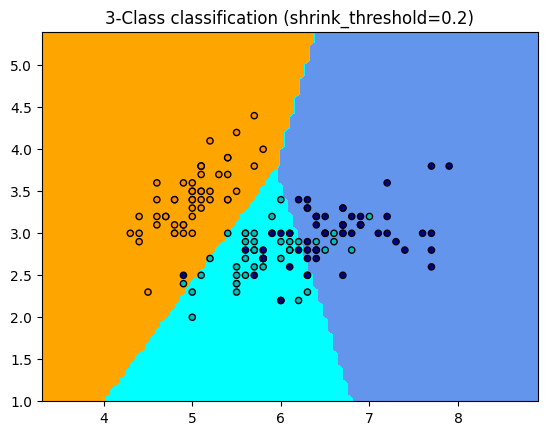

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

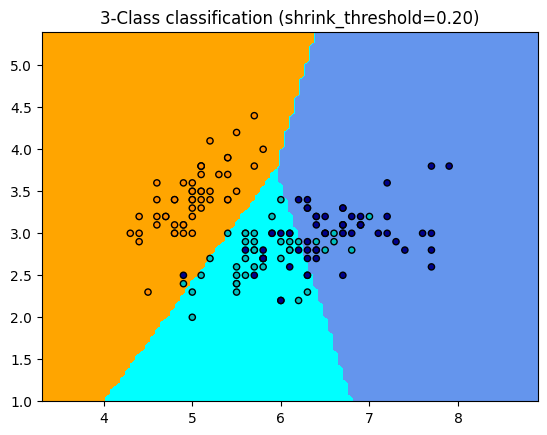

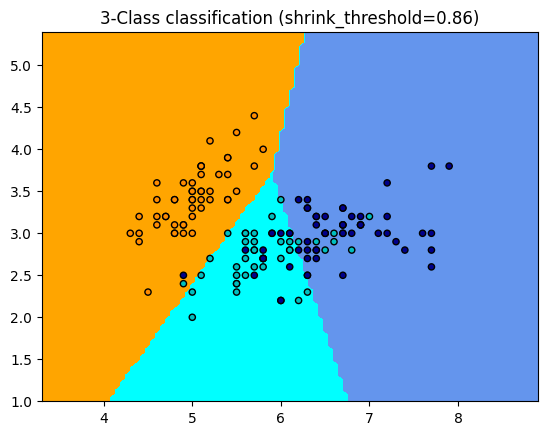

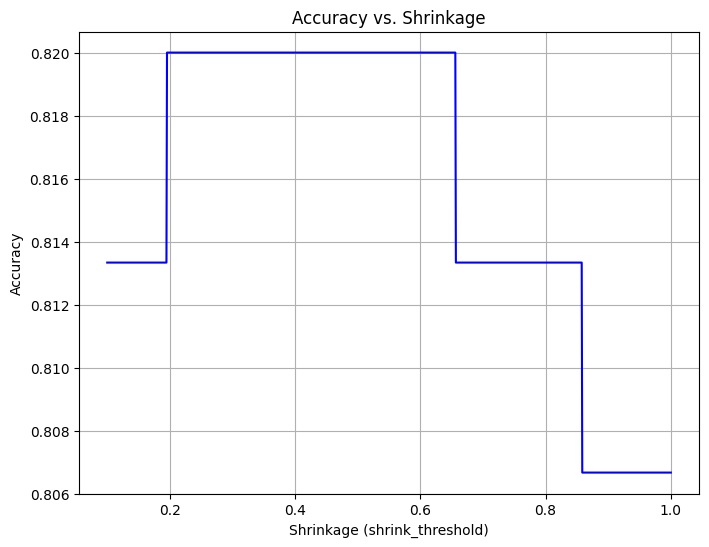

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

# Initialize lists to store accuracy and shrinkage values
shrinkage_values = [None] + list(np.linspace(0.1, 1.0, 1000))
accuracies = []

for shrinkage in shrinkage_values:
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = np.mean(y == y_pred)
    accuracies.append(accuracy)

# Find the indices of the best and worst accuracies
best_index = np.argmax(accuracies)
worst_index = np.argmin(accuracies)

# Plot decision boundaries for the best and worst accuracies
for index, label in zip([best_index, worst_index], ["Best", "Worst"]):
    shrinkage = shrinkage_values[index]
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title(f"3-Class classification (shrink_threshold={shrinkage:.2f})")
    plt.axis("tight")

plt.show()

# Plot accuracy vs. shrinkage
plt.figure(figsize=(8, 6))
plt.plot(shrinkage_values, accuracies, linestyle='-', color='b')
plt.xlabel('Shrinkage (shrink_threshold)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Shrinkage')
plt.grid(True)
plt.show()
